In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

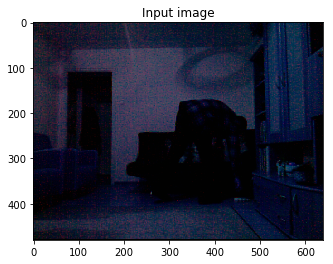

In [2]:
main_folder=r"D:\BTech\Data_set"
m=os.listdir(main_folder)
path=os.path.join(main_folder,m[2])
filename=os.listdir(path)[300]
p=os.path.join(path,filename)

img = cv2.imread(p)

plt.title('Input image')
plt.imshow(img); plt.show()

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img, None)
img_keypoints = cv2.drawKeypoints(img,key_points,img, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
#print(description)
print(description.shape)


(289, 32)


## Feature Extraction

In [4]:
main_folder=r"D:\BTech\Data_set"

for folder in os.listdir(main_folder):
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        resize=(300,300)
        img=cv2.resize(a,resize) #resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create()   #initialise  detector
        keypoints, descriptors = orb.detectAndCompute(gray, None)
        out=pd.DataFrame(descriptors)
        csv_data=out.to_csv(str(folder)+'raw_features.csv', mode='a', header=False)
    print('Extraction of ' + str(folder) +' images Done!')  

Extraction of Sitting images Done!
Extraction of Sleep_fall images Done!
Extraction of Standing_none images Done!


In [5]:
from csv import writer
from csv import reader

main_folder=r"D:\BTech\Data_set"
for folder in os.listdir(main_folder):
    with open(str(folder)+'raw_features.csv', 'r') as read_obj, \
        open('Raw_wo_kmeans.csv', 'a+', newline='') as write_obj:
        csv_reader = reader(read_obj)     # Create a csv.reader object from the input file object
        csv_writer = writer(write_obj)    # Create a csv.writer object from the output file object
        for row in csv_reader:
                csv_writer.writerow(row)      # Add the updated row / list to the output file


##  

In [ ]:
Sum_of_squared_distances = []
df = pd.read_csv('raw_wo_kmeans.csv').iloc[:, 1:]

print(df.shape)
K = range(10,100,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    print(k, end=' ')

In [6]:
print(Sum_of_squared_distances)
K = range(10,50,10)

[412291282742.89886, 380262567368.8125, 363394610061.81506, 352042961978.6586]


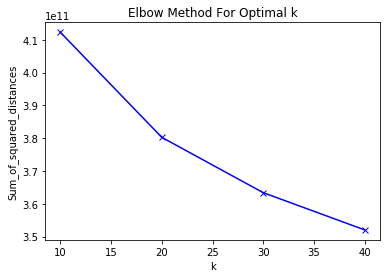

In [7]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## KMeans

In [10]:
import pickle
data=pd.read_csv('raw_wo_kmeans.csv').iloc[:, 1:]
kmeans = KMeans(n_clusters=30)
model=kmeans.fit(data)
print(model)
pickle.dump(model, open('kmeansmodel1.pkl', 'wb')) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [14]:
main_folder=r"D:\BTech\Data_set"
bins=[int(x) for x in range(31)]
for folder in os.listdir(main_folder):
    model = pickle.load(open('kmeansmodel1.pkl', "rb"))
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        resize=(300,300)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create()#initialise  detector
        keypoints, descriptors = orb.detectAndCompute(gray, None)
        out=pd.DataFrame(descriptors)
        
        print(filename,end=' ')
        output=pd.DataFrame(model.predict(out))
        hist=np.histogram(output.values,bins)
        histout=pd.DataFrame(hist[0])
        
        csv_data=histout.transpose().to_csv(str(folder)+'_kmeans'+'.csv', mode='a', header=False)
        
    print('KMeans of ' + str(folder) +' images Done!')

000030708.jpg 000071686.jpg 000085370.jpg 000099186.jpg 000124344.jpg adl-02-cam0-rgb-127.png adl-02-cam0-rgb-128.png adl-02-cam0-rgb-129.png adl-02-cam0-rgb-130.png adl-02-cam0-rgb-131.png adl-02-cam0-rgb-132.png adl-02-cam0-rgb-133.png adl-02-cam0-rgb-134.png adl-02-cam0-rgb-135.png adl-02-cam0-rgb-136.png adl-02-cam0-rgb-137.png adl-02-cam0-rgb-138.png adl-02-cam0-rgb-139.png adl-02-cam0-rgb-140.png adl-02-cam0-rgb-141.png adl-02-cam0-rgb-142.png adl-02-cam0-rgb-143.png adl-02-cam0-rgb-144.png adl-02-cam0-rgb-145.png adl-02-cam0-rgb-146.png adl-02-cam0-rgb-147.png adl-02-cam0-rgb-148.png adl-02-cam0-rgb-149.png adl-02-cam0-rgb-150.png adl-02-cam0-rgb-151.png adl-02-cam0-rgb-152.png adl-02-cam0-rgb-153.png adl-02-cam0-rgb-154.png adl-02-cam0-rgb-155.png adl-02-cam0-rgb-156.png adl-02-cam0-rgb-157.png adl-02-cam0-rgb-158.png adl-02-cam0-rgb-159.png adl-02-cam0-rgb-160.png adl-02-cam0-rgb-161.png adl-02-cam0-rgb-162.png adl-02-cam0-rgb-163.png adl-02-cam0-rgb-164.png adl-02-cam0-rgb-16

## Labelling

In [15]:
from csv import writer
from csv import reader

main_folder=r"D:\BTech\Data_set"
classes=['Sitting','Sleeping','Standing or None']
i=0
for folder in os.listdir(main_folder):
    with open(str(folder)+'_kmeans'+'.csv', 'r') as read_obj, \
        open('Final_features.csv', 'a+', newline='') as write_obj:
        csv_reader = reader(read_obj)     # Create a csv.reader object from the input file object
        csv_writer = writer(write_obj)    # Create a csv.writer object from the output file object
        # Read each row of the input csv file as list
        for row in csv_reader:
            row.append(classes[i])            # Append the class in the row / list
            csv_writer.writerow(row)      # Add the updated row / list to the output file
    i+=1
    

In [3]:
features=pd.read_csv('Final_features.csv').iloc[:, 1:31]
label=pd.read_csv('Final_features.csv').iloc[:, 31]
#print(label)

In [4]:
stdSlr = StandardScaler().fit(features)
features_std = stdSlr.transform(features)

In [5]:

pca = PCA(.95)
principalComponents = pca.fit_transform(features_std)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

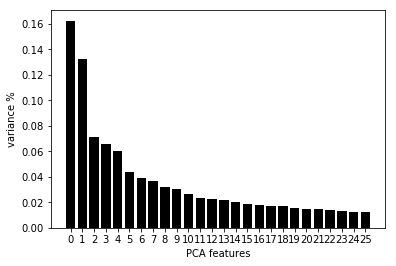

(7996, 30)
(7996, 26)


In [6]:
plt.show()
print(features_std.shape)
print(PCA_components.shape)

In [7]:
#features_std[0:5]

In [8]:
#dataset = pd.read_csv('Final_features.csv')
X = PCA_components
y = label
print(X.shape)
print(y)

(7996, 26)
0                Sitting
1                Sitting
2                Sitting
3                Sitting
4                Sitting
5                Sitting
6                Sitting
7                Sitting
8                Sitting
9                Sitting
10               Sitting
11               Sitting
12               Sitting
13               Sitting
14               Sitting
15               Sitting
16               Sitting
17               Sitting
18               Sitting
19               Sitting
20               Sitting
21               Sitting
22               Sitting
23               Sitting
24               Sitting
25               Sitting
26               Sitting
27               Sitting
28               Sitting
29               Sitting
              ...       
7966    Standing or None
7967    Standing or None
7968    Standing or None
7969    Standing or None
7970    Standing or None
7971    Standing or None
7972    Standing or None
7973    Standing or None
7974    Standi

## Splitting Data

In [9]:
from sklearn.model_selection import train_test_split

X = (X - np.min(X)) / (np.max(X) - np.min(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Classification

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(y_pred)

['Standing or None' 'Sitting' 'Sleeping' ... 'Sleeping' 'Sleeping'
 'Sleeping']


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[789  44  28]
 [ 26 698  28]
 [ 35  38 713]]
                  precision    recall  f1-score   support

         Sitting       0.93      0.92      0.92       861
        Sleeping       0.89      0.93      0.91       752
Standing or None       0.93      0.91      0.92       786

     avg / total       0.92      0.92      0.92      2399

Accuracy: 0.9170487703209671


In [43]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

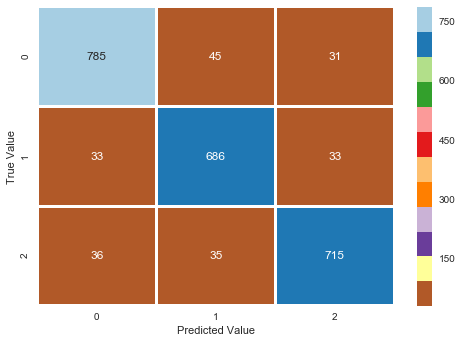

In [32]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Paired_r", linewidth=2, linecolor='w', fmt='.0f')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

## SVM

In [53]:
from sklearn.svm import SVC
svm =  SVC()
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
y_pred=svm.predict(X_test)

from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[645 130  86]
 [150 530  72]
 [216 134 436]]
                  precision    recall  f1-score   support

         Sitting       0.64      0.75      0.69       861
        Sleeping       0.67      0.70      0.69       752
Standing or None       0.73      0.55      0.63       786

     avg / total       0.68      0.67      0.67      2399

Accuracy: 0.6715298040850355


## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
y_pred=svm.predict(X_test)

from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[702  97  62]
 [ 86 611  55]
 [125  89 572]]
                  precision    recall  f1-score   support

         Sitting       0.77      0.82      0.79       861
        Sleeping       0.77      0.81      0.79       752
Standing or None       0.83      0.73      0.78       786

     avg / total       0.79      0.79      0.79      2399

Accuracy: 0.6715298040850355


In [55]:
from sklearn import metrics
est=range(20,200,20)
acc_score=[]
err=[]
for n in est:
    clf=RandomForestClassifier(n_estimators=n)
    clf.fit(X_train,y_train)
    score=metrics.accuracy_score(y_test, y_pred)
    acc_score.append(score)
    pred_i = clf.predict(X_test)
    err.append(np.mean(pred_i != y_test))

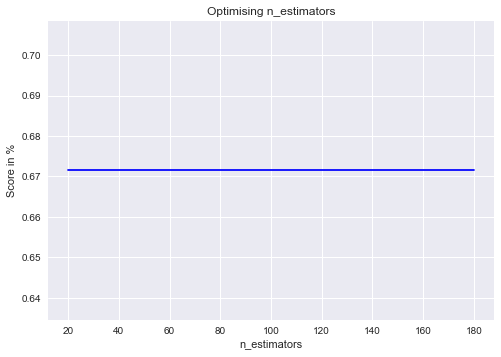

In [56]:
plt.plot(est, acc_score, 'bx-')
plt.xlabel('n_estimators')
plt.ylabel('Score in %')
plt.title('Optimising n_estimators')
plt.show()

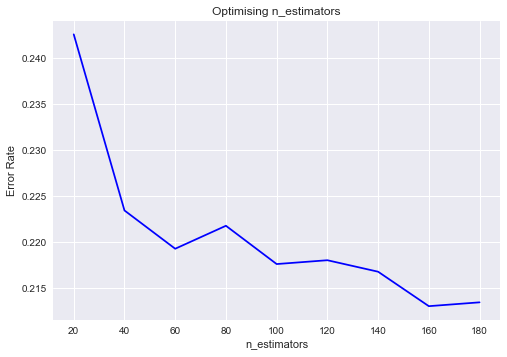

In [57]:
plt.plot(est, err, 'bx-')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
plt.title('Optimising n_estimators')
plt.show()

## Saving Classifier

## Classification Trial

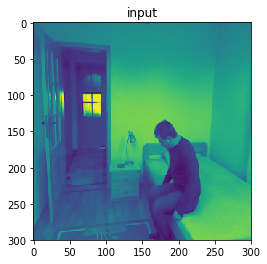

In [69]:
import pickle
model = pickle.load(open('kmeansmodel1.pkl', "rb"))
main_folder=r"D:\BTech\Data_set\Sitting"
bins=[int(x) for x in range(31)]
p=os.path.join(main_folder,'adl-37-cam0-rgb-227.png')
a=cv2.imread(p)
resize=(300,300)
img=cv2.resize(a,resize)#resize image
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray)
plt.title('input')
plt.show()

orb = cv2.ORB_create()#initialise  detector
keypoints, descriptors = orb.detectAndCompute(gray, None)
out=pd.DataFrame(descriptors)
        
output=pd.DataFrame(model.predict(out))
hist=np.histogram(output.values,bins)
histout=pd.DataFrame(hist[0])

In [72]:
m=[]
m.append(hist[0])
loaded_model = pickle.load(open(filename, 'rb'))
output=pd.DataFrame(m)
print(output)
x1 = output.iloc[:, 1:27]

prediction=loaded_model.predict(x1)
print(prediction)

   0   1   2   3   4   5   6   7   8   9  ...  20  21  22  23  24  25  26  27  \
0  27   3  42   7   8  10  33  15  13  22 ...  15  19  23  17  10  10  14  10   

   28  29  
0  21  23  

[1 rows x 30 columns]
['Standing or None']


In [48]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [49]:
print(result)

0.9170487703209671


>10, train: 0.996, test: 0.823
>20, train: 0.999, test: 0.873
>30, train: 0.999, test: 0.887
>40, train: 0.999, test: 0.882
>50, train: 0.999, test: 0.900
>60, train: 0.999, test: 0.899
>70, train: 0.999, test: 0.901
>80, train: 0.999, test: 0.902
>90, train: 0.999, test: 0.906
>100, train: 0.999, test: 0.906
>110, train: 0.999, test: 0.905
>120, train: 0.999, test: 0.905
>130, train: 0.999, test: 0.912
>140, train: 0.999, test: 0.906
>150, train: 0.999, test: 0.907
>160, train: 0.999, test: 0.909
>170, train: 0.999, test: 0.912
>180, train: 0.999, test: 0.907
>190, train: 0.999, test: 0.910
>200, train: 0.999, test: 0.907
>210, train: 0.999, test: 0.908
>220, train: 0.999, test: 0.906
>230, train: 0.999, test: 0.911
>240, train: 0.999, test: 0.910
>250, train: 0.999, test: 0.913
>260, train: 0.999, test: 0.913
>270, train: 0.999, test: 0.912
>280, train: 0.999, test: 0.912
>290, train: 0.999, test: 0.914
>300, train: 0.999, test: 0.907
>310, train: 0.999, test: 0.915
>320, train: 0.99

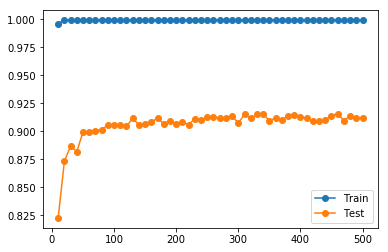

In [74]:
from sklearn.metrics import accuracy_score

from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(10, 510,10)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(n_estimators=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()